C:\Users\zeesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score: 0.45994823920518635
Hierarchical Clustering Silhouette Score: 0.4466890410285909
DBSCAN Silhouette Score: 0.35651648142700726


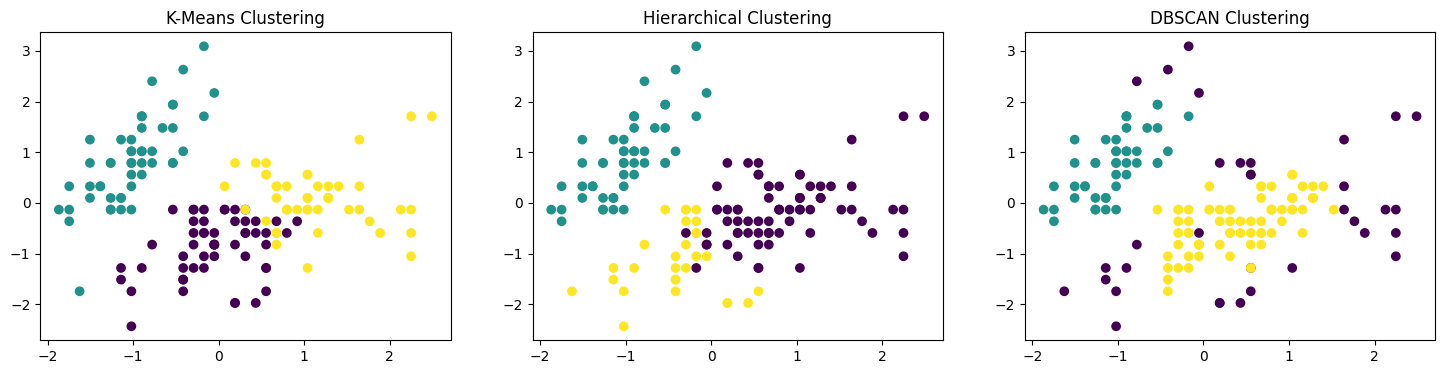

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = data.iloc[:, :-1]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_std)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

kmeans_silhouette = silhouette_score(X_std, kmeans_labels)
agg_silhouette = silhouette_score(X_std, agg_labels)
dbscan_silhouette = silhouette_score(X_std, dbscan_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {agg_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_std[:, 0], X_std[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()
